# **Results**

In [117]:
# magics
%load_ext autoreload
%reload_ext autoreload

%autoreload 2

# load general packages
import tools
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# load modules
from model_nvfi import model_bufferstock

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/var/folders/67/5lclr44x13d7lzxtqq4c11r40000gn/T/ipykernel_14307/952247622.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


**Setup**

In [118]:
model = model_bufferstock()

In [119]:
sol = model.sol
par = model.par
aux = model.aux

model.setup()
model.allocate()
model.create_grids()

**Solve with NFVI**

In [120]:
model.solve_nvfi()

T ===========  4
T ===========  3
T ===========  2
T ===========  1
T ===========  0


Text(0, 0.5, '$c^*(\\bar{d},\\bar{n})$')

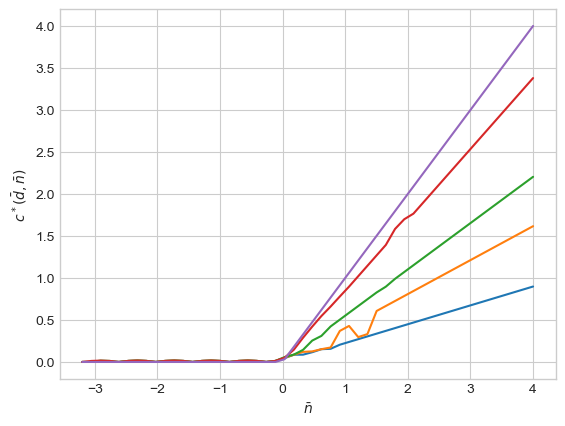

In [126]:
for t in range(par.T):
    plt.plot(aux.grid_n,sol.c[t,0,:,0])

plt.xlabel(r'$\bar{n}$')
plt.ylabel(r'$c^*(\bar{d},\bar{n})$')

**State space**

In [115]:
model.state_space(approx_points=40)

T ===========  1


In [ ]:
model.state_space(approx_points=40)

T ===========  1
T ===========  2
T ===========  3
T ===========  4


Check accuracy of approximations

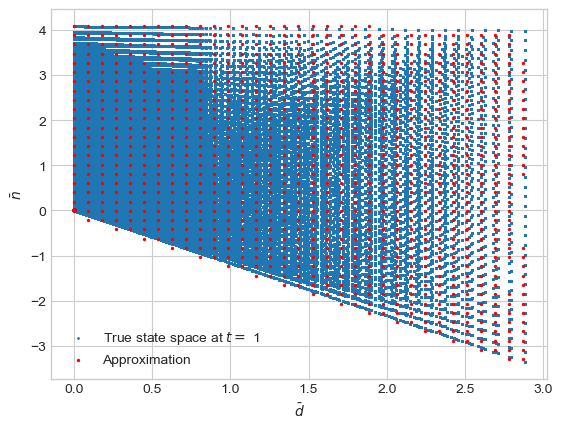

In [116]:
model.plot_state_space(t_plot=1,true_space=True)

Check state space over time

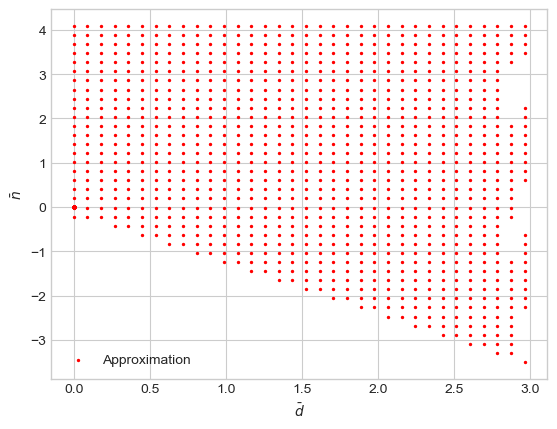

In [71]:
model.plot_state_space(t_plot=3)

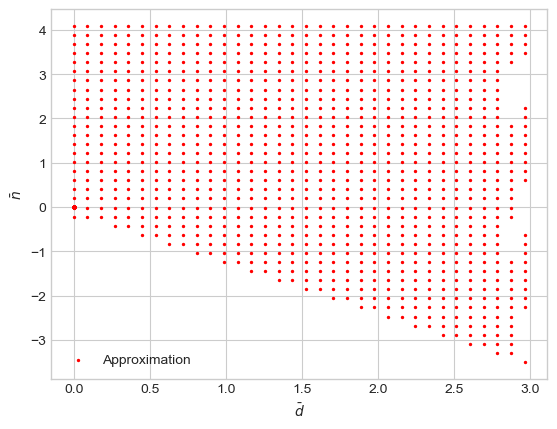

In [72]:
model.plot_state_space(t_plot=4)

**Solve with VFI**

In [35]:
model.setup()

In [36]:
model.allocate()

In [37]:
model.solve_vfi()

T =  4
T =  3
T =  2
T =  1
T =  0


Check post-decision value function

In [121]:
model.post_decision(par.T-2)

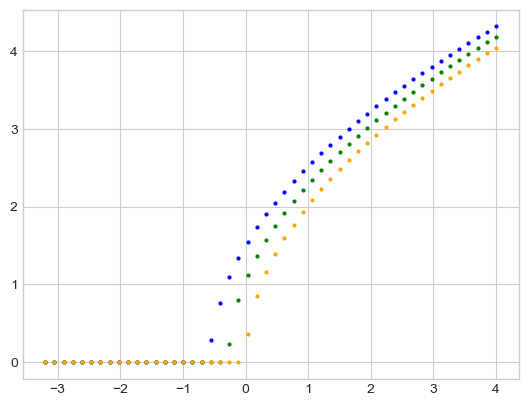

In [122]:
plt.plot(aux.grid_n, sol.w[par.T-2,:,10,0], 'o', ms=2, color='blue')
plt.plot(aux.grid_n, sol.w[par.T-2,:,5,0], 'o', ms=2, color='green')
plt.plot(aux.grid_n, sol.w[par.T-2,:,0,0], 'o', ms=2, color='orange')